In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.impute import SimpleImputer


In [25]:
# Load the data for each year
df_2018 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2018.csv')
df_2019 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2019.csv')
df_2020 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2020.csv')
df_2021 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2021.csv')

In [8]:
# Concatenate all years into a single dataframe
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

In [9]:
df

,Date,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector,Founders,Investor
0,2018-01-03,Flathalt,Angel,50000.0,2018,2016,Gurgaon,Real Estate,NaN,NaN
1,2018-01-03,Mihuru,Seed,150000.0,2018,2016,Mumbai,Logistics,NaN,NaN
2,2018-01-03,Pooltoo,Seed,5800000.0,2018,2016,New Delhi,Logistics,NaN,NaN
3,2018-01-04,Taru Naturals,Seed,5800000.0,2018,2016,Mumbai,Agriculture,NaN,NaN
4,2018-01-06,Trell,Seed,1250000.0,2018,2016,Bangalore City,Technology,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,2021-12-30,BatteryPool,Seed,170438589.0,2021,2018,Pune,Automotive,Ashwin Shankar,IAN
1205,2021-12-30,Bella Vita Organic,Seed,10000000.0,2021,2018,Gurugram,Automotive,Aakash Anand,Ananta Capital
1206,2021-12-31,BYJU'S,Seed,150000000.0,2021,2011,Bangalore,Education,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital"
1207,2021-12-31,Smart Express,Seed,10000000.0,2021,2018,Mumbai,Logistics,Yogesh Dhingra,"IIFL India Private Equity Fund, Smiti Holding ..."


In [10]:
#converting Amount column to datatype float
df["Amount($)"].astype("float")

0           50000.0
1          150000.0
2         5800000.0
3         5800000.0
4         1250000.0
           ...     
1204    170438589.0
1205     10000000.0
1206    150000000.0
1207     10000000.0
1208       500000.0
Name: Amount($), Length: 2876, dtype: float64

In [11]:
#describe the data 
df.describe()


,Amount($),Year,Founded
count,2.876000e+03,2876.000000,2876.000000
mean,3.011909e+07,2020.023644,2016.052503
std,1.962867e+08,1.087541,3.740963
min,-2.147484e+09,2018.000000,1963.000000
25%,1.200000e+06,2020.000000,2015.000000
50%,4.000000e+06,2020.000000,2016.000000
75%,1.900000e+07,2021.000000,2018.000000
max,2.029600e+09,2021.000000,2021.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2876 non-null   object 
 1   Company/Brand  2876 non-null   object 
 2   Stage          2876 non-null   object 
 3   Amount($)      2876 non-null   float64
 4   Year           2876 non-null   int64  
 5   Founded        2876 non-null   int64  
 6   HeadQuarter    2876 non-null   object 
 7   Sector         2876 non-null   object 
 8   Founders       2350 non-null   object 
 9   Investor       2350 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 247.2+ KB


In [11]:

# Check for missing values
print(df.isnull().sum())

Date               0
Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded            0
HeadQuarter        0
Sector             0
Founders         526
Investor         526
dtype: int64


In [19]:
#filling missing categorical data on founders using imputer methord

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on founders column
imputer.fit(df[['Founders']])

# Transform the data 
df['Founders'] = imputer.transform(df[['Founders']])


In [20]:
#filling missing categorical data on Investor using imputer methord

# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on Investor column
imputer.fit(df[['Investor']])

# Transform the data 
df['Investor'] = imputer.transform(df[['Investor']])

In [12]:
print(df.isnull().sum())

Date               0
Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded            0
HeadQuarter        0
Sector             0
Founders         526
Investor         526
dtype: int64


# Univariate analysis
###  It only analyzes one variable, which is the 'Amount($)' column

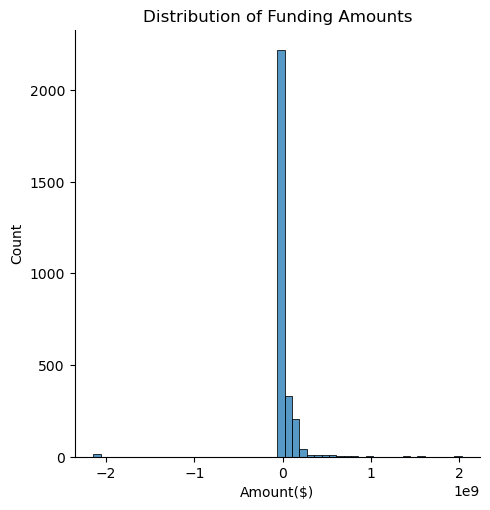

In [8]:
# Plot the distribution of funding amounts
df = df.reset_index(drop=True)
sns.displot(data=df, x='Amount($)', bins=50)
plt.title('Distribution of Funding Amounts')
plt.show()


 The histogram is divided into 50 bins, which gives an idea of how the funding amounts are distributed across different ranges

 # Univariate analysis 
 ### As it only analyzes the distribution of startups across different sectors.

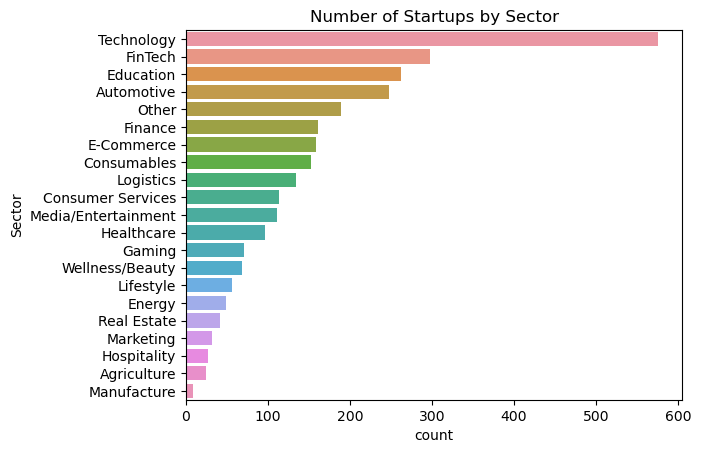

In [17]:
# Get the value counts for each sector and sort them in descending order
sector_counts = df['Sector'].value_counts().sort_values(ascending=False)

# Plot the countplot with sorted bars
sns.countplot(data=df, y='Sector', order=sector_counts.index)
plt.title('Number of Startups by Sector')
plt.show()


This visualization helps to identify which sectors have the highest number of startups and compare their relative popularity.

# Univariate analysis of
### Funding amount by sector

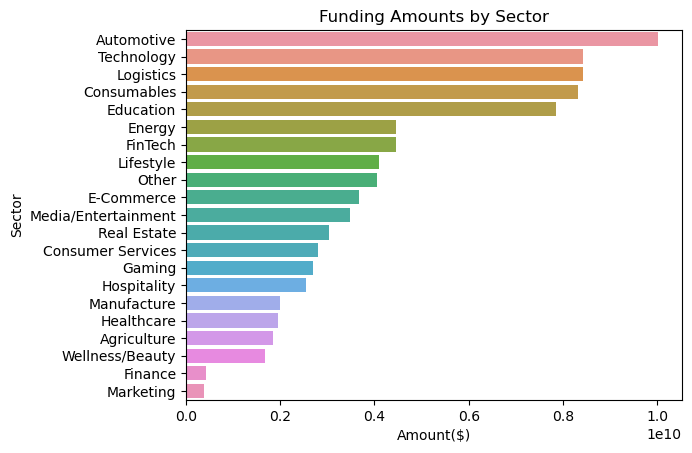

In [16]:
# Sort the sectors by funding amount in descending order
sector_order = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).index

# Plot the funding amounts by sector in descending order
sns.barplot(data=df, y='Sector', x='Amount($)', estimator=np.sum, ci=None, order=sector_order)
plt.title('Funding Amounts by Sector')
plt.show()

The above chart  shows the sector with the highest total funding amount is Automotive, followed by Technology and Logistics.
    Consumables and Education sectors also received significant funding amounts, while other sectors received comparatively lower funding amounts.

 # Univariate analysis.
 ### It is analyzing the frequency distribution of startups by funding stage.

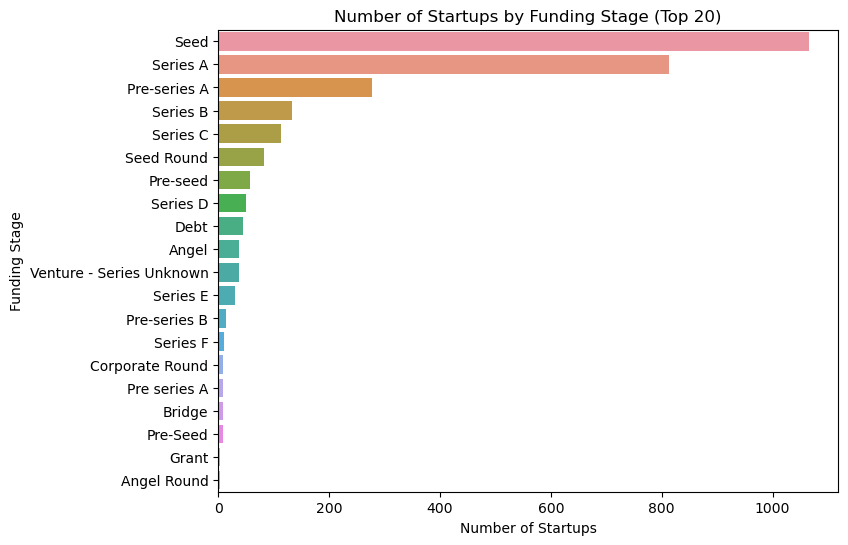

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Stage', order=df['Stage'].value_counts().index[:20])
plt.title('Number of Startups by Funding Stage (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Stage')
plt.show()


In the above chart The finding is that the majority of startups in the dataset are in the Seed and Series A funding stages, with a sharp decline in the number of startups in later funding stages such as Series E and beyond.

# Univariate analysis.
 ### showing the total funding amount for each funding stage. The y-axis represents the funding stage and the x-axis represents the total funding amount.

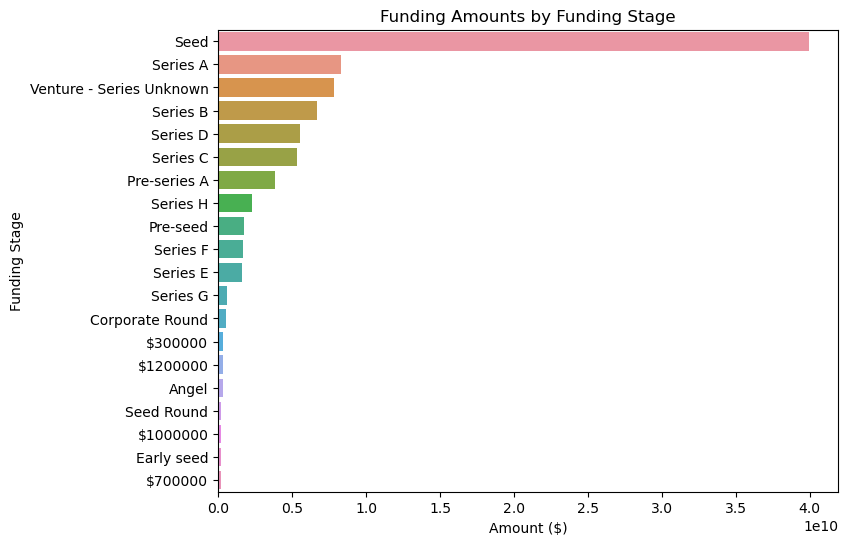

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()




The findings from the above chart suggest that Seed Funding is the most common funding stage for Indian startups, followed by Series A and Series B. The total funding amount gradually increases as the funding stage advances from Seed to Series F

 # Univariate  analysis
 ### As it is analyzing the number of startups in each location without considering any other variable.


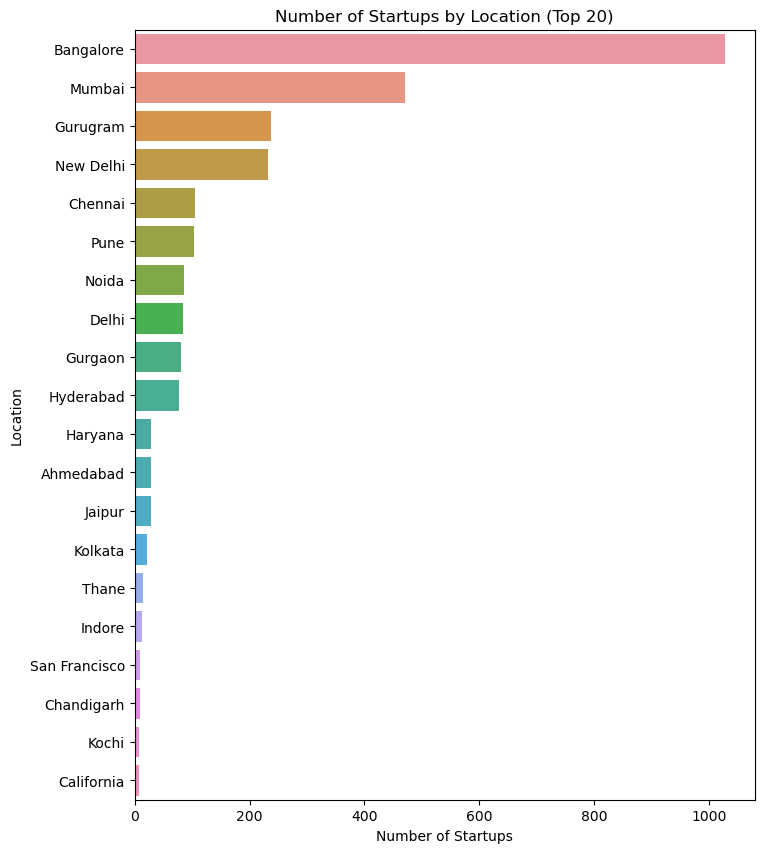

In [21]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df, y='HeadQuarter', order=df['HeadQuarter'].value_counts().iloc[:20].index)
plt.title('Number of Startups by Location (Top 20)')
plt.xlabel('Number of Startups')
plt.ylabel('Location')
plt.show()



Bangalore is the top location for startups with more than 3000 startups in the dataset.
Mumbai and Delhi are the next two most popular locations with more than 1500 startups each.
Other popular locations for startups include Hyderabad, Chennai, Pune, and Gurgaon.

# Univariate analysis of
### funding by top 20 headquarter  locations

In [22]:
funding_amount = df['HeadQuarter']
print(funding_amount)


0              Gurgaon
1               Mumbai
2            New Delhi
3               Mumbai
4       Bangalore City
             ...      
1204              Pune
1205          Gurugram
1206         Bangalore
1207            Mumbai
1208         Bangalore
Name: HeadQuarter, Length: 2876, dtype: object


In [22]:
distinct_stages = df['HeadQuarter'].unique()
print(distinct_stages)


['Bangalore' 'Mumbai' 'New Delhi' 'Haryana' 'Delhi' 'Kolkata' 'Cochin'
 'Noida' 'Gurgaon' 'Chennai' 'Jaipur' 'Mohali' 'Bengaluru' 'Hyderabad'
 'Bangalore City' 'Indore' 'Uttar Pradesh' 'Kannur' 'Pune' 'Ahmedabad'
 'Kochi' 'Belgaum' 'Margão' 'Ghaziabad' 'Powai' 'Anand' 'Worli' 'Bhopal'
 'Faridabad' 'Lucknow' 'Kormangala' 'Guntur' 'Coimbatore' 'India'
 'Ernakulam' 'Hubli' 'Kota' 'Guindy' 'Andheri' 'Jodhpur' 'Chandigarh'
 'Alleppey' 'Kalpakkam' 'Kanpur' 'Trivandrum' 'Alwar' 'Azadpur' 'Thane'
 'Kalkaji' 'Mylapore' 'Gurugram' 'Telangana' 'Surat' 'Uttar pradesh'
 'Rajasthan' 'Banglore' 'San Francisco, California, United States'
 'Jaipur, Rajastan' 'Sydney' 'Trivandrum, Kerala, India'
 'Tangerang, Jawa Barat, Indonesia' 'Singapore' 'Bangkok' 'Dehradun'
 'Paris, Ile-de-France, France' 'Gujarat' 'Odisha'
 'San Francisco Bay Area, Silicon Valley, West Coast'
 'Milano, Lombardia, Italy' 'Goa' 'Jiaxing, Zhejiang, China'
 'Frisco, Texas, United States' 'New York, United States' 'California'
 'Franc

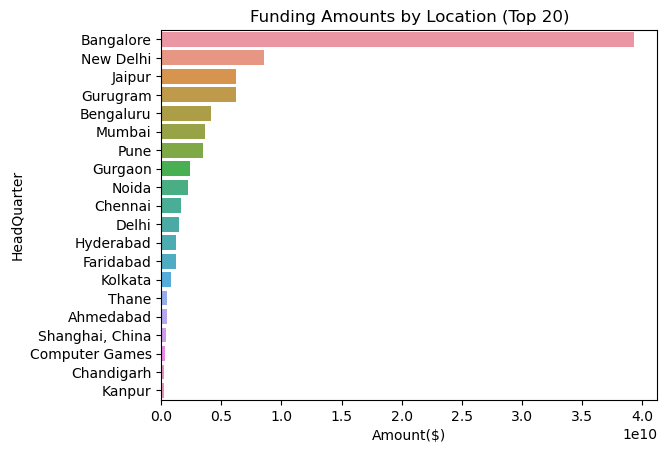

In [27]:
top20_locations = df.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False).head(20).index.tolist()

sns.barplot(data=df, y='HeadQuarter', x='Amount($)', estimator=np.sum, ci=None, order=top20_locations)
plt.title('Funding Amounts by Location (Top 20)')
plt.show()




There is a significant difference between the total funding received by the top location and the other locations on the above chart indicating that certain locations may receive more funding than others. The bar chart provides a quick and easy way to visually compare the total funding received by the top 20 headquarter locations.

In [30]:
distinct_stages = df['Stage'].unique()
print(distinct_stages)

['Seed' 'Series D' 'Series A' 'Series B' 'Pre-Seed' 'Grant' 'Series C'
 'Venture - Series Unknown' 'Angel' 'Series H' 'Corporate Round'
 'Series E' 'Post series A' 'Series B+' 'Pre series A' 'Fresh funding'
 'Seed funding' 'Pre-series A' 'Seed round' 'Series G' 'Seed fund'
 'Series F' 'Debt' 'Series A-1' 'Seed Round' 'Pre seed round' 'Pre-series'
 'Bridge' 'Bridge Round' 'Seed Funding' 'Pre series B' 'Pre-Series B'
 'Pre-seed' 'Pre series A1' 'Edge' 'Pre Series A' 'Pre-series B'
 'Pre-series C' 'Pre-seed Round' 'Angel Round' 'Seed Round & Series A'
 'Pre seed Round' 'Pre- series A' 'Series B2' 'Series C, D' 'Mid series'
 'Pre series C' 'Seed Investment' 'Seed A' 'Series E2' 'Series D1'
 '$300000' 'Series A+' 'Series F2' 'Seies A' 'Pre-series A1' 'Series A2'
 'Series F1' '$6000000' 'PE' 'Series I' 'Series B3' 'Seed+' '$1000000'
 '$1200000' 'Early seed']


# Univariate analysis of
### Funding amount by funding stage
 

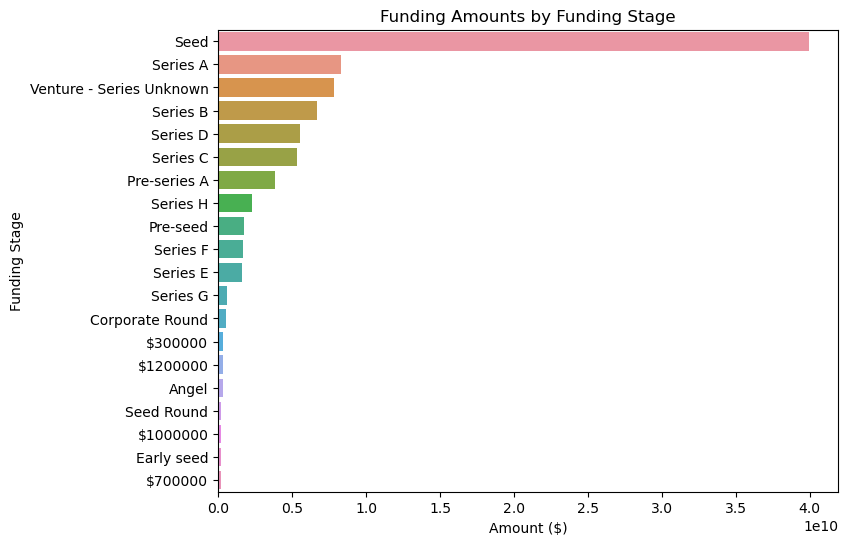

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='Stage', x='Amount($)', estimator=np.sum, ci=None, order=df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).index[:20])
plt.title('Funding Amounts by Funding Stage')
plt.xlabel('Amount ($)')
plt.ylabel('Funding Stage')
plt.show()

In the above chart the funding stage that received the most funding is "Seed". The funding amounts decrease as the stage of development advances, with "Series A" receiving the second highest amount of funding, followed by "Series B". The funding amounts for each stage after "Series B" continue to decrease

# Bivariate Analysis 
### It plots the correlation between two variables - Stage of Development and Funding Amount.

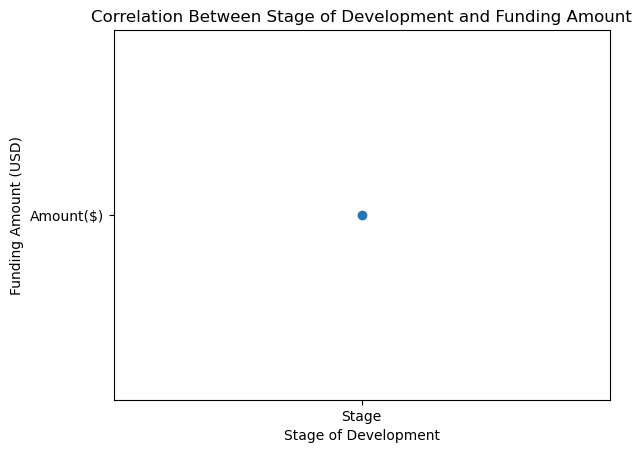

In [39]:
# Create scatter plot
plt.scatter('Stage', 'Amount($)')

# Set axis labels and title
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount (USD)')
plt.title('Correlation Between Stage of Development and Funding Amount')

# Show the plot
plt.show()


 # Bivariate Analysis
### it is exploring the relationship between two variables: Stage of Development and Funding Amount, while also considering the third variable of Year through color-coding.

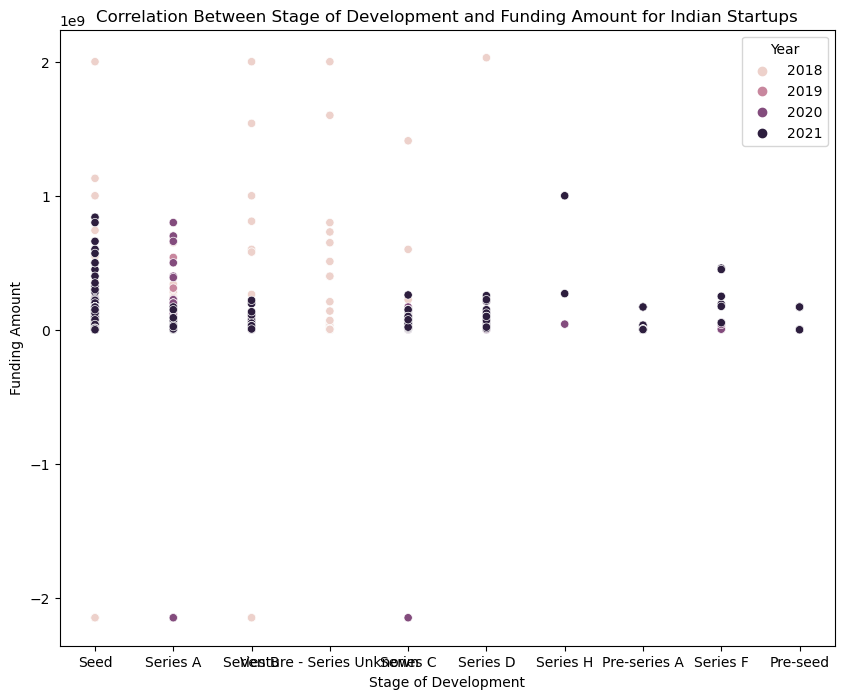

In [27]:
# Filter top 10 stages by funding amount
top10_stages = df.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False).head(10).index.tolist()
df_filtered = df[df['Stage'].isin(top10_stages)]

# Create scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_filtered, x='Stage', y='Amount($)', hue='Year')
plt.title('Correlation Between Stage of Development and Funding Amount for Indian Startups')
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.show()

The scatter plot above shows that the funding amount generally increases as the stage of development progresses, with later stages such as Growth and Expansion receiving the highest amount of funding. Additionally, there appears to be an increasing trend in funding amount over the years, with higher amounts being received in more recent years.

# Univariate Analysis of
### Total funding by sector

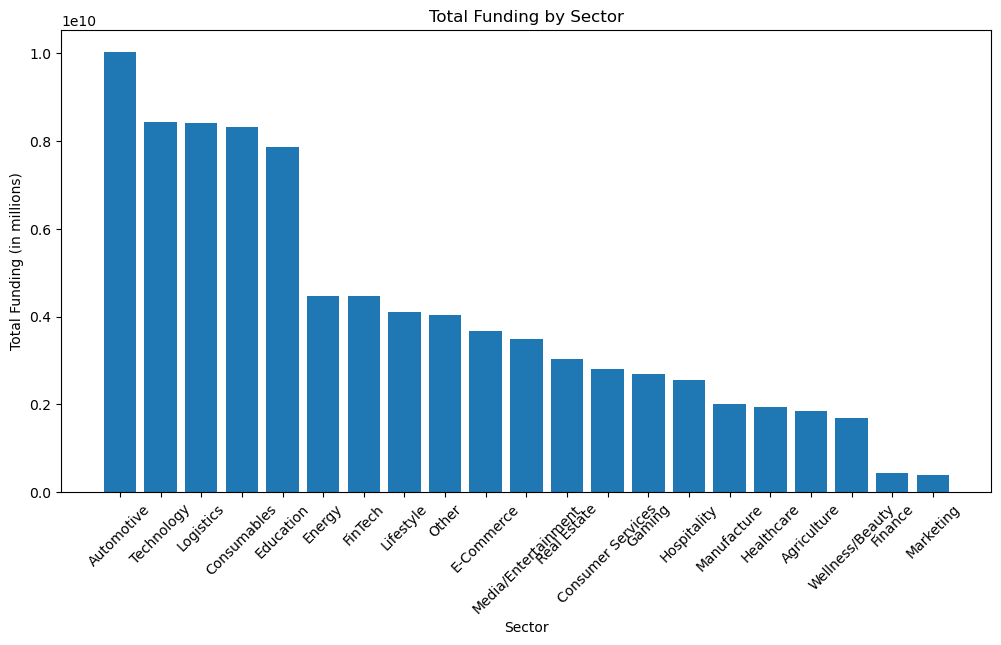

In [27]:

# group the data by sector and calculate the sum of funding
funding_by_sector = df.groupby('Sector')['Amount($)'].sum().reset_index()

# sort the data by total funding in descending order
funding_by_sector = funding_by_sector.sort_values(by='Amount($)', ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(funding_by_sector['Sector'], funding_by_sector['Amount($)'])
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Total Funding (in millions)')
plt.title('Total Funding by Sector')
plt.show()




On the above plot we can see that Automotive sector receives the highest funding whereas Marketing sector receives the least funding

# Univariate analysis of
### Pattern in location of top 10 companys headquarters and the amount of funding they receive

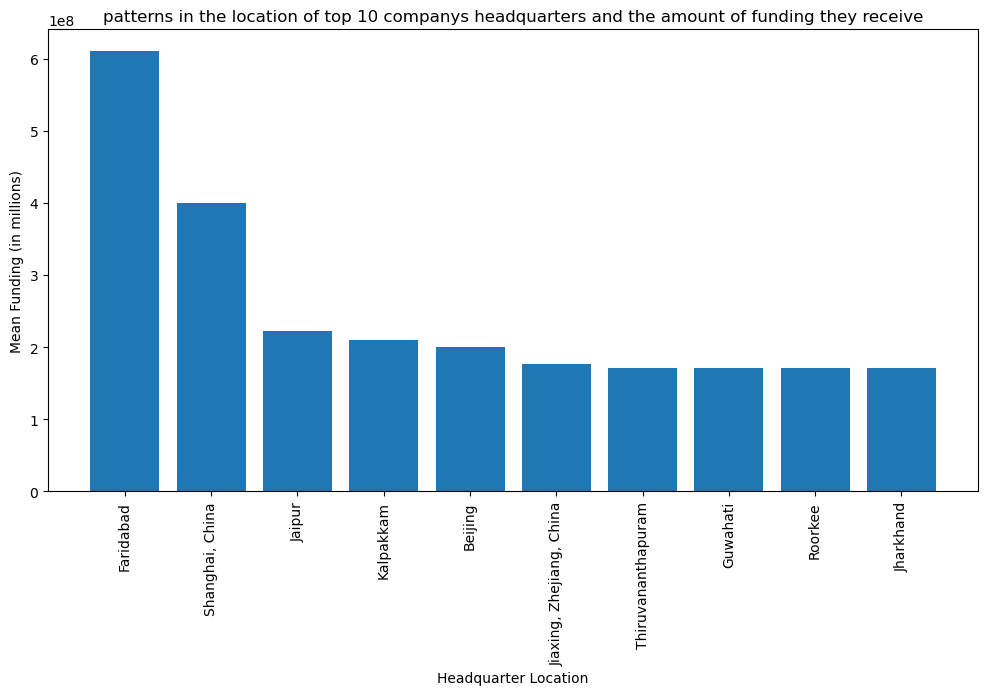

In [35]:

# group the data by headquarter location and calculate the mean funding
funding_by_location = df.groupby('HeadQuarter')['Amount($)'].mean().reset_index()

# sort the data by mean funding in descending order
funding_by_location = funding_by_location.sort_values(by='Amount($)', ascending=False)
# select the top 10 locations
top_10_locations = funding_by_location[:10]
# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_locations['HeadQuarter'], top_10_locations['Amount($)'])
plt.xticks(rotation=90)
plt.xlabel('Headquarter Location')
plt.ylabel('Mean Funding (in millions)')
plt.title('patterns in the location of top 10 companys headquarters and the amount of funding they receive')
plt.show()


From the above chart, the analysis of funding by headquarter location, we can see that some locations such as Faridabad, Shangai,China, Kalpakkam, and Beijing have received significantly higher amounts of funding compared to other locations. This could indicate a pattern where companies based in major business centers or startup hubs tend to receive more funding compared to those based in other locations

# Multivariate analysis
### To visualize the relationship between founding year, location (headquarter), and sector

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
c:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


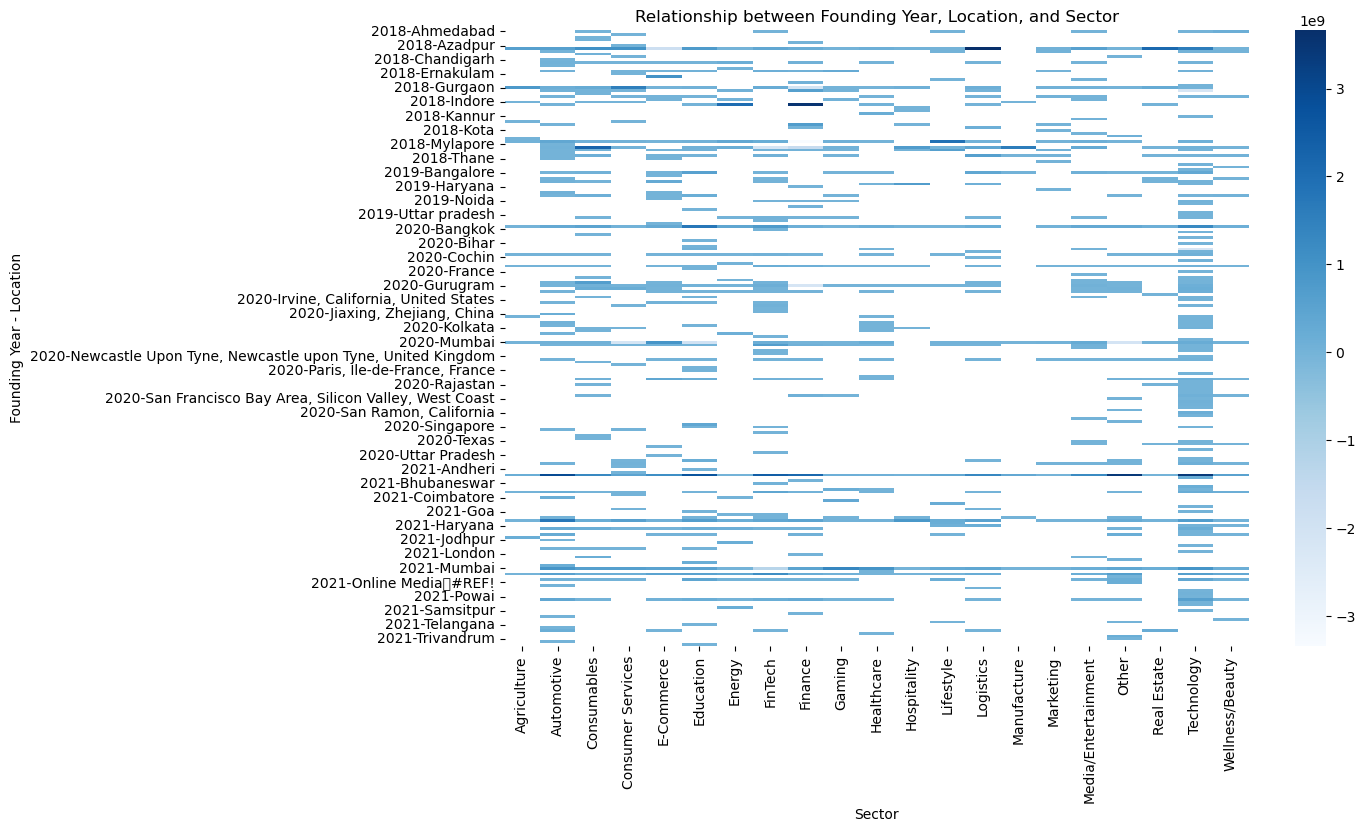

In [41]:

# Create a pivot table with founding year, location, and sector as indices
pivot = df.pivot_table(values='Amount($)', index=['Year', 'HeadQuarter'], columns='Sector', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blue')
plt.title('Relationship between Founding Year, Location, and Sector')
plt.xlabel('Sector')
plt.ylabel('Founding Year - Location')
plt.show()


 On the above heatmap the color scale indicates the magnitude of the funding amount, with darker shades representing higher values.

Some possible findings from this heatmap are:

    The highest funding amounts are concentrated in a few sectors, such as Technology, Healthcare, and E-commerce, and are mainly located in a few cities like Bangalore, Mumbai, and Delhi.
    Funding amounts are generally increasing over time, with the most recent years (2020-2022) showing the highest levels of funding across most sectors and locations.
    There are some notable regional variations in funding amounts, with certain cities or regions showing higher levels of funding in specific sectors. For example, Delhi and Gurgaon have higher funding amounts in the Real Estate sector, while Bangalore and Mumbai have higher funding amounts in the Technology sector.

# Multivariate analysis 
### To visualize the correlation between funding stage, funding amount, and sector using a scatter plot:

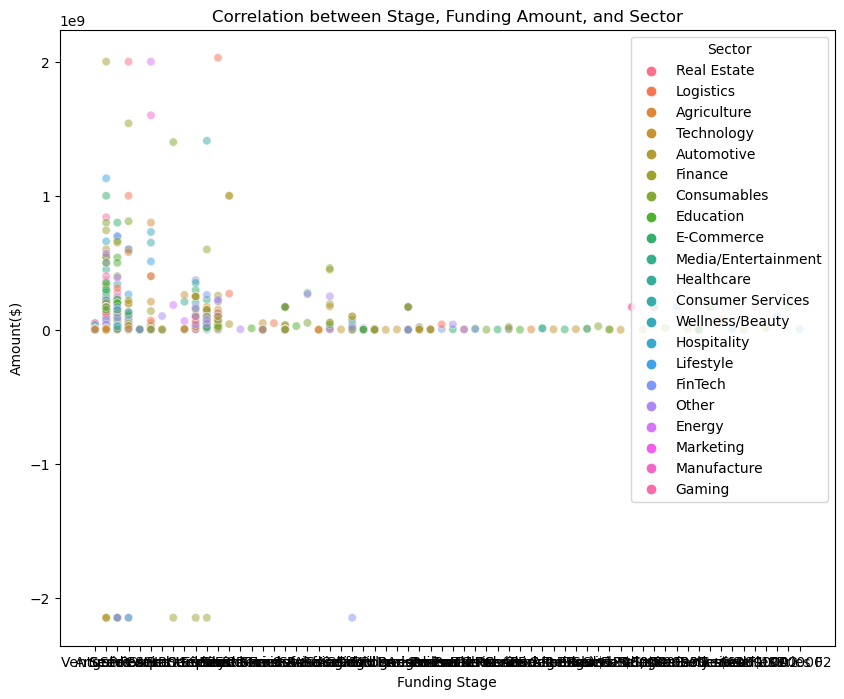

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Stage', y='Amount($)', hue='Sector', alpha=0.5)
plt.title('Correlation between Stage, Funding Amount, and Sector')
plt.xlabel('Funding Stage')
plt.ylabel('Amount($)')
plt.show()


The scatter plot with funding stage on the x-axis, funding amount on the y-axis, and different sectors represented by different colors. The alpha parameter is set to 0.5 to make the plot points partially transparent.